# Ejemplo 6

Programa para calcular el valor esperado de una variable aleatoria

$$ \mathbb{E}[g(x_1)] = \int_{-\infty }^{\infty} g(x) f_{x_1}(x) \,dx $$

Proponiendo las siguientes funciones de densidad:

Para la función de densidad simétrica:

Distribución Normal

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right)
$$

Para una distribución normal con $\mu = 0$ y $\sigma = 1$, la función de densidad es:

$$
f(x) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{x^2}{2}\right)
$$


Para la función de densidad asimétrica:

Distribución Gamma

$$
f(x) = \frac{x^{\alpha - 1} e^{-x / \beta}}{\beta^{\alpha} \Gamma(\alpha)}
$$

Para una distribución Gamma con $\alpha = 2$ y $\beta = 1$, la función de densidad es:

$$
f(x) = \frac{x^{2 - 1} e^{-x / 1}}{1^{2} \Gamma(2)}
$$

Simplificando, como $\Gamma(2) = 1! = 1$:

$$
f(x) = x e^{-x}
$$


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir la variable aleatoria X
x = sp.Symbol('x')

# Definir las funciones de densidad
# Ejemplo de función de densidad simétrica (Distribución Normal)
mean = 0
std_dev = 1
f_x_sym = sp.exp(-x**2 / (2 * std_dev**2)) / (std_dev * sp.sqrt(2 * sp.pi))

# Ejemplo de función de densidad asimétrica (Distribución Gamma)
shape = 2
scale = 1
f_x_asym = (x**(shape - 1) * sp.exp(-x / scale)) / (scale**shape * sp.gamma(shape))


Calculo del valor esperado

$$ \mathbb{E}[X] = \int_{-\infty }^{\infty} g(x) f_{x_1}(x) \,dx $$

In [ ]:
# Calcular el valor esperado para ambas distribuciones
E_X_sym = sp.integrate(x * f_x_sym, (x, -sp.oo, sp.oo))
E_X_asym = sp.integrate(x * f_x_asym, (x, 0, sp.oo))

f_x_sym_func = sp.lambdify(x, f_x_sym, 'numpy')
f_x_asym_func = sp.lambdify(x, f_x_asym, 'numpy')


Graficar las funciones de densidad y su valor esperado

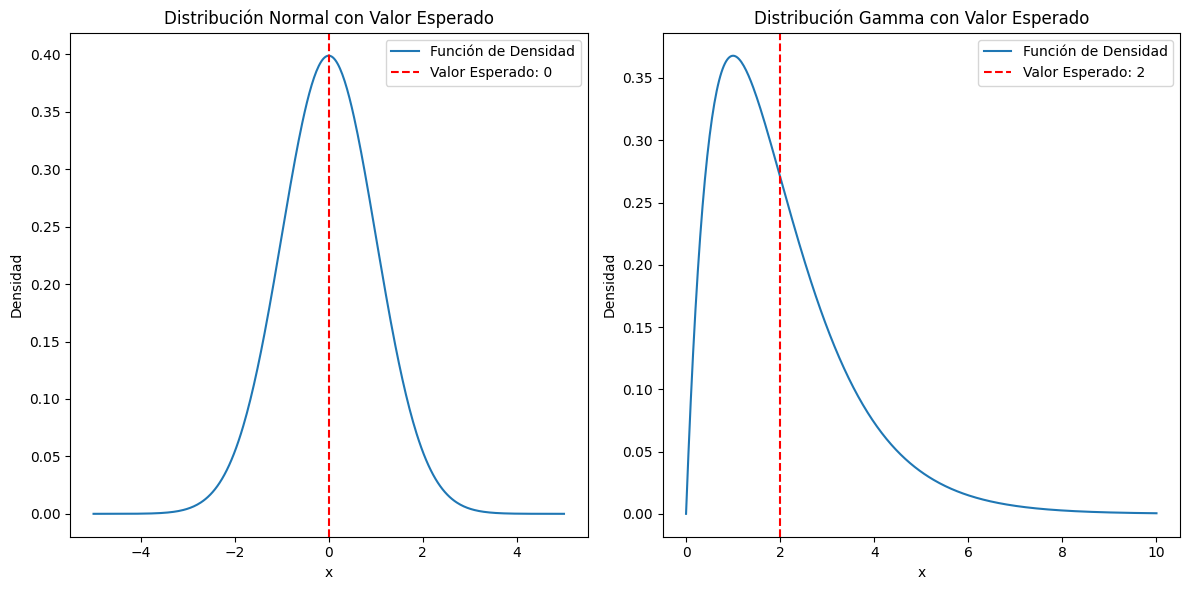

In [ ]:
# Crear un rango de valores para graficar
x_vals = np.linspace(-5, 5, 400)
x_vals_asym = np.linspace(0, 10, 400)

plt.figure(figsize=(12, 6))

# Para la distribución Normal
plt.subplot(1, 2, 1)
plt.plot(x_vals, f_x_sym_func(x_vals), label='Función de Densidad')
plt.axvline(E_X_sym, color='r', linestyle='--', label=f'Valor Esperado: {E_X_sym}')
plt.title('Distribución Normal con Valor Esperado')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

# Para la distribución Gamma
plt.subplot(1, 2, 2)
plt.plot(x_vals_asym, f_x_asym_func(x_vals_asym), label='Función de Densidad')
plt.axvline(E_X_asym, color='r', linestyle='--', label=f'Valor Esperado: {E_X_asym}')
plt.title('Distribución Gamma con Valor Esperado')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# Comprobacion de algunas propiedades de $\mathbb{E}$

 2.- Si $\mathbb{E}[X] = b$ entonces $\mathbb{E}[X]$ minimiza a $\mathbb{E}[(x-b)^2]$.

In [ ]:
a, b, c = sp.symbols('a b c')

# Propiedad 2: Minimización de E[(X - b)^2]
b = sp.symbols('b')
E_X = E_X_sym  # Media de X
minimization_expression = sp.integrate((x - b)**2 * f_x_sym, (x, -sp.oo, sp.oo))
E_x_b = minimization_expression.subs(b, E_X)

# Mostrar resultados
print("E[X] = ", E_X_sym)
# print("Esperanza de X para distribución gamma:", E_X_asym)
print("E[(X - b)^2] = ", E_x_b)


E[X] =  0
E[(X - b)^2] =  1


# 3.- Sean X, Y variables aleatorias con expectaciones finitas.

Entonces:

3.1.- Si g(x) mayor igual a h(x) entonces $\mathbb{E}[g(x)]$ mayor igual a $\mathbb{E}[h(x)]$

3.2.- Si $\mathbb{E}[aX+bY+c]$ = $a\mathbb{E}[X] + bE[Y] + c$ para cualesquiera a,b,c $\in \mathbb{R}$.

In [ ]:
# Propiedad 3.1
g = x**2
h = x-1
E_g = sp.integrate(g * f_x_sym, (x, -sp.oo, sp.oo))
E_h = sp.integrate(h * f_x_sym, (x, -sp.oo, sp.oo))

E_g= sp.simplify(E_g)
E_h = sp.simplify(E_h)

E_g = E_g.evalf()
E_h = E_h.evalf()

print("\nPropiedad 3.1: g(x) >= h(x) implica E[g(X)] >= E[h(X)]")
print("E[g(X)] =", E_g)
print("E[h(X)] =", E_h)


# Propiedad 3.2

import numpy as np

mu_X, sigma_X = 0, 1  # Media y desviación estándar para X
mu_Y, sigma_Y = 1, 4  # Media y desviación estándar para Y

# Coeficientes a, b, c
a, b, c = 2, 3, 5  # Puedes cambiar estos valores para diferentes casos

# Simular muestras aleatorias de X e Y
num_samples = 100000
X = np.random.normal(mu_X, sigma_X, num_samples)
Y = np.random.normal(mu_Y, sigma_Y, num_samples)

# Calcular E[aX + bY + c]
E_linear_comb = np.mean(a * X + b * Y + c)

# Calcular aE[X] + bE[Y] + c
E_X = np.mean(X)
E_Y = np.mean(Y)
E_linear_expr = a * E_X + b * E_Y + c

# Mostrar resultados
print("\nPropiedad 3.2: Linealidad")
print(f"E[aX + bY + c] = {E_linear_comb}")
print(f"aE[X] + bE[Y] + c = {E_linear_expr}")


Propiedad 3.1: g(x) >= h(x) implica E[g(X)] >= E[h(X)]
E[g(X)] = 1.00000000000000
E[h(X)] = -1.00000000000000

Propiedad 3.2: Linealidad
E[aX + bY + c] = 8.018357107000673
aE[X] + bE[Y] + c = 8.018357107000673


# 4.- Sean X,Y variables aleatorias que cumplan E[XY] = E[X]E[Y] o bien, E[g(x)h(y)] = E[g(x)] E[h(y)]

In [ ]:
# Propiedad 4: Independencia de variables
y = sp.Symbol('y')
E_XY = sp.integrate(x * y * f_x_sym * f_x_sym, (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))
E_XE_Y = E_X_sym * E_X_asym

print("\nPropiedad 4: Independencia de variables")
print("E[XY] =", E_XY)
print("E[X]E[Y] =", E_XE_Y)


Propiedad 4: Independencia de variables
E[XY] = 0
E[X]E[Y] = 0
